<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_98/blob/main/Reto_DS_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://static.wikia.nocookie.net/tecdemonterrey/images/1/1b/Logo_Tec_azul.png/revision/latest?cb=20190219041656&path-prefix=es" width="230" />

## **Actividad Semanal 8- Reto**


----

**Datos generales**
---
**Alumna:**

| Nombre | Matrícula del estudiante
|---|---|
| Andrés Felipe Velasco Muñoz | **A01676755** |
| Helmy Andrea Moreno Navarro | **A01793918** |


>**Materia:** Ciencia y Análistica de Datos (Gpo 10)

>**Profesora Titular:** María de la Paz Rico


16 de noviembre 2022

#**Introducción**

El agua subterránea resulta de la infiltración profunda a través de poros o grietas de sedimentos y rocas de agua proveniente de la precipitación o fuentes superficiales intercontectadas. Así, el agua se almacena en acuíferos que se constituyen en embalses naturales que puede ser aprovechados por el hombre para satisfacer diversas necesidades mediante diferentes tipos de capataciones como aljibes, pozos profundos, adecuación de manantiales; o también puede retornar  de forma natural hacia sistemas acuáticos y terrestres interdependientes, cumpliendo una importante función reguladora de las corrientes hídricas o prestando diversos servicios ecosistémicos (Figura 1).

Las aguas subterráneas representan la mayor reserva de agua dulce de las regiones habitadas por seres humanos, con un 95% del total de aguas disponibles de todos los continentes y territorios insulares.

De la matriz hídrica se tiene que el 97,5% corresponde a los océanos, del 2,5% restante, el 70% no se encuentra disponible para consumo humano debido a que está en forma de glaciares, nieve o hielo, el 0,3% se encuentra en lagos, ríos y humedales y el 29,7% corresponde a agua subterránea (Ministerio de Ambiente y Desarrollo Sostenible Colombia).




Figura 1 (Formación y distribución de aguas subterráneas)

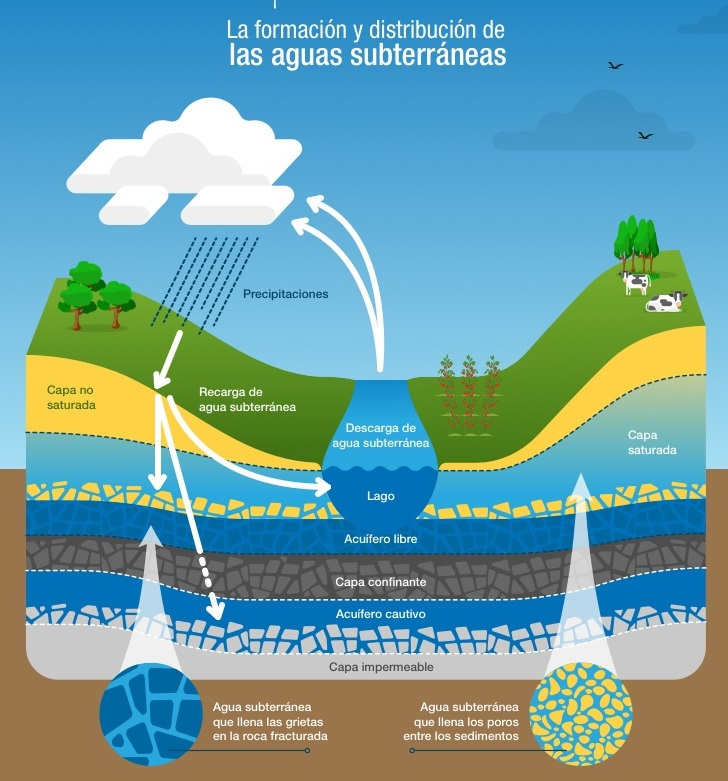

# **Objetivos**
Para garantizar una adecuada evaluación y gestión del agua subterránea es importante partir de una caracterización fisicoquímica y microbiológica de cada pozo y acuífero que permita identificar la calidad del agua de cada uno de estos y de esta manera en primera instancia proponer tratamientos direccionados a cada necesidad y así definir el uso que se le puede dar a cada agua específica, con la finalidad de prevenir problemas de salud pública ocasionados por consumo de agua contaminada.

Además, con la información recopilada es posible diseñar, promover e implementar estrategias para la ampliación y consolidación del conocimiento hidrogeológico de sistemas acuíferos entre las comunidades. También permite implementar estrategias de fortalecimiento institucional para la adecuada gestión del recurso hídrico subterráneo y asignación de recursos económicos para financiación de proyectos de evaluación, protección y conservación.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import geopandas as gpd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

import requests, zipfile
from io import BytesIO

from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, Normalizer, StandardScaler


In [2]:
#Instalamos libreria para trabajar con mapas
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#**Limpieza, análisis, visualización y agrupamiento.**

#Importar datos

In [3]:
sub = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'
req = requests.get(sub)
zipfile.ZipFile(BytesIO(req.content)).extractall('unzipped_zip/')

df=pd.read_csv('unzipped_zip/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding = 'latin1')
df


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [4]:
print(df["SEMAFORO"].value_counts())

Verde       434
Rojo        387
Amarillo    247
Name: SEMAFORO, dtype: int64


In [5]:
sem_map = pd.DataFrame(df['SEMAFORO'])
sem_map


,SEMAFORO
0,Verde
1,Verde
2,Rojo
3,Verde
4,Rojo
...,...
1063,Rojo
1064,Rojo
1065,Rojo
1066,Verde


In [6]:
df_subte = df.copy()
df_subte.describe().T

,count,mean,std,min,25%,50%,75%,max
LONGITUD,1068.0,-101.891007,6.703263,-116.66425,-105.388865,-102.17418,-98.974716,-86.864120
LATITUD,1068.0,23.163618,3.887670,14.56115,20.212055,22.61719,25.510285,32.677713
PERIODO,1068.0,2020.000000,0.000000,2020.00000,2020.000000,2020.00000,2020.000000,2020.000000
ALC_mg/L,1064.0,235.633759,116.874291,26.64000,164.000000,215.52750,292.710000,1650.000000
CONDUCT_mS/cm,1062.0,1138.953013,1245.563674,50.40000,501.750000,815.00000,1322.750000,18577.000000
SDT_mg/L,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_subte.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [8]:
df_subte.shape

(1068, 57)

In [9]:
df_subte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [10]:
df_subte = pd.DataFrame(df_subte)
df_subte['SEMAFORO'] = df_subte['SEMAFORO'].astype('category')
df_subte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   CLAVE                 1068 non-null   object  
 1   SITIO                 1068 non-null   object  
 2   ORGANISMO_DE_CUENCA   1068 non-null   object  
 3   ESTADO                1068 non-null   object  
 4   MUNICIPIO             1068 non-null   object  
 5   ACUIFERO              1068 non-null   object  
 6   SUBTIPO               1068 non-null   object  
 7   LONGITUD              1068 non-null   float64 
 8   LATITUD               1068 non-null   float64 
 9   PERIODO               1068 non-null   int64   
 10  ALC_mg/L              1064 non-null   float64 
 11  CALIDAD_ALC           1064 non-null   object  
 12  CONDUCT_mS/cm         1062 non-null   float64 
 13  CALIDAD_CONDUC        1062 non-null   object  
 14  SDT_mg/L              0 non-null      float64 
 15  SDT_

In [11]:
df_subte.isna().sum().sort_values(ascending=False)

SDT_mg/L                1068
CONTAMINANTES            434
CALIDAD_CONDUC             6
CONDUCT_mS/cm              6
ALC_mg/L                   4
CALIDAD_ALC                4
CALIDAD_SDT_ra             2
SDT_M_mg/L                 2
CALIDAD_SDT_salin          2
CALIDAD_N_NO3              1
CALIDAD_DUR                1
N_NO3_mg/L                 1
DUR_mg/L                   1
CUMPLE_CON_COND            0
CUMPLE_CON_ALC             0
SEMAFORO                   0
CALIDAD_FE                 0
FE_TOT_mg/L                0
CALIDAD_MN                 0
CUMPLE_CON_SDT_ra          0
CUMPLE_CON_SDT_salin       0
CLAVE                      0
CUMPLE_CON_FLUO            0
CUMPLE_CON_DUR             0
CALIDAD_PB                 0
CUMPLE_CON_CF              0
CUMPLE_CON_NO3             0
CUMPLE_CON_AS              0
CUMPLE_CON_CD              0
CUMPLE_CON_CR              0
CUMPLE_CON_HG              0
CUMPLE_CON_PB              0
CUMPLE_CON_MN              0
MN_TOT_mg/L                0
CD_TOT_mg/L   

In [12]:
categoricas_sub = ['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',	'ACUIFERO',	'SUBTIPO',	'CALIDAD_ALC', 'CALIDAD_CONDUC',	'SDT_mg/L',	'CALIDAD_SDT_ra',	'CALIDAD_SDT_salin',	'CALIDAD_FLUO',	'CALIDAD_DUR',	'CALIDAD_COLI_FEC',	'CALIDAD_N_NO3',	'CALIDAD_AS',	'CALIDAD_CD',	'CALIDAD_CR',
                  'CALIDAD_HG',	'CALIDAD_PB',	'CALIDAD_MN',	'CALIDAD_FE',	'CONTAMINANTES',	'CUMPLE_CON_ALC',	'CUMPLE_CON_COND',	'CUMPLE_CON_SDT_ra',	'CUMPLE_CON_SDT_salin',	'CUMPLE_CON_FLUO',	'CUMPLE_CON_DUR',	'CUMPLE_CON_CF',	'CUMPLE_CON_NO3',	'CUMPLE_CON_AS',
                  'CUMPLE_CON_CD',	'CUMPLE_CON_CR',	'CUMPLE_CON_HG',	'CUMPLE_CON_PB',	'CUMPLE_CON_MN',	'CUMPLE_CON_FE', 'CONDUCT_mS/cm',]

In [13]:
numericas = ['LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
       'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L',
       'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L', 'SEMAFORO']

In [14]:
df_sub = df_subte[['LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
       'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L',
       'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L', 'SEMAFORO']]
df_sub

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,SEMAFORO
0,-102.02210,22.20887,2020,229.990,603.6,0.9766,213.732,<1.1,4.184656,0.0161,<0.003,<0.005,<0.0005,<0.005,<0.0015,0.0891,Verde
1,-102.20075,21.99958,2020,231.990,445.4,0.9298,185.0514,<1.1,5.75011,0.0134,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,Verde
2,-102.28801,22.36685,2020,204.920,342,1.8045,120.719,<1.1,1.449803,0.037,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,Rojo
3,-102.29449,22.18435,2020,327.000,478.6,1.1229,199.879,<1.1,1.258597,0.0154,<0.003,0.005,<0.0005,<0.005,<0.0015,<0.025,Verde
4,-110.24480,23.45138,2020,309.885,1179,0.2343,476.9872,291,15.672251,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,Rojo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,-99.54191,24.76036,2020,231.045,1545.8,<0.2,752.096,<1.1,14.615488,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,Rojo
1064,-99.70099,24.78280,2020,256.000,297,<0.2,273,<1.1,77.392,<0.01,<0.003,<0.005,<0.0005,<0.005,0.00709,0.07578,Rojo
1065,-99.82249,25.55197,2020,330.690,1873,0.7574,660.2126,620,36.477104,<0.01,<0.003,<0.005,<0.0005,<0.005,0.0242,0.2129,Rojo
1066,-100.32683,24.80118,2020,193.140,690.6667,0.7108,406.368,<1.1,<0.02,<0.01,<0.003,<0.005,<0.0005,<0.005,0.012,0.1786,Verde


In [15]:
df_sub.columns

Index(['LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L', 'SDT_M_mg/L',
       'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L',
       'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L', 'HG_TOT_mg/L',
       'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L', 'SEMAFORO'],
      dtype='object')

In [16]:
df_sub.max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


LONGITUD               -86.86412
LATITUD                32.677713
PERIODO                     2020
ALC_mg/L                  1650.0
FLUORUROS_mg/L              <0.2
COLI_FEC_NMP/100_mL         <1.1
AS_TOT_mg/L                <0.01
CD_TOT_mg/L               <0.003
CR_TOT_mg/L               <0.005
HG_TOT_mg/L              <0.0005
PB_TOT_mg/L               <0.005
MN_TOT_mg/L              <0.0015
FE_TOT_mg/L               <0.025
dtype: object

#**Limpieza
Datos nulos

In [17]:
df_sub

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,SEMAFORO
0,-102.02210,22.20887,2020,229.990,603.6,0.9766,213.732,<1.1,4.184656,0.0161,<0.003,<0.005,<0.0005,<0.005,<0.0015,0.0891,Verde
1,-102.20075,21.99958,2020,231.990,445.4,0.9298,185.0514,<1.1,5.75011,0.0134,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,Verde
2,-102.28801,22.36685,2020,204.920,342,1.8045,120.719,<1.1,1.449803,0.037,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,Rojo
3,-102.29449,22.18435,2020,327.000,478.6,1.1229,199.879,<1.1,1.258597,0.0154,<0.003,0.005,<0.0005,<0.005,<0.0015,<0.025,Verde
4,-110.24480,23.45138,2020,309.885,1179,0.2343,476.9872,291,15.672251,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,Rojo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,-99.54191,24.76036,2020,231.045,1545.8,<0.2,752.096,<1.1,14.615488,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,Rojo
1064,-99.70099,24.78280,2020,256.000,297,<0.2,273,<1.1,77.392,<0.01,<0.003,<0.005,<0.0005,<0.005,0.00709,0.07578,Rojo
1065,-99.82249,25.55197,2020,330.690,1873,0.7574,660.2126,620,36.477104,<0.01,<0.003,<0.005,<0.0005,<0.005,0.0242,0.2129,Rojo
1066,-100.32683,24.80118,2020,193.140,690.6667,0.7108,406.368,<1.1,<0.02,<0.01,<0.003,<0.005,<0.0005,<0.005,0.012,0.1786,Verde


In [18]:
enc_sem = OrdinalEncoder()
df_sub[['SEMAFORO']] = enc_sem.fit_transform(df_sub[['SEMAFORO']])
df_sub

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,LONGITUD,LATITUD,PERIODO,ALC_mg/L,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,SEMAFORO
0,-102.02210,22.20887,2020,229.990,603.6,0.9766,213.732,<1.1,4.184656,0.0161,<0.003,<0.005,<0.0005,<0.005,<0.0015,0.0891,2.0
1,-102.20075,21.99958,2020,231.990,445.4,0.9298,185.0514,<1.1,5.75011,0.0134,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,2.0
2,-102.28801,22.36685,2020,204.920,342,1.8045,120.719,<1.1,1.449803,0.037,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,1.0
3,-102.29449,22.18435,2020,327.000,478.6,1.1229,199.879,<1.1,1.258597,0.0154,<0.003,0.005,<0.0005,<0.005,<0.0015,<0.025,2.0
4,-110.24480,23.45138,2020,309.885,1179,0.2343,476.9872,291,15.672251,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,-99.54191,24.76036,2020,231.045,1545.8,<0.2,752.096,<1.1,14.615488,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,1.0
1064,-99.70099,24.78280,2020,256.000,297,<0.2,273,<1.1,77.392,<0.01,<0.003,<0.005,<0.0005,<0.005,0.00709,0.07578,1.0
1065,-99.82249,25.55197,2020,330.690,1873,0.7574,660.2126,620,36.477104,<0.01,<0.003,<0.005,<0.0005,<0.005,0.0242,0.2129,1.0
1066,-100.32683,24.80118,2020,193.140,690.6667,0.7108,406.368,<1.1,<0.02,<0.01,<0.003,<0.005,<0.0005,<0.005,0.012,0.1786,2.0


In [19]:
for i in numericas:
  print(" nombre de la columna -------------------------" + i)

 nombre de la columna -------------------------LONGITUD
 nombre de la columna -------------------------LATITUD
 nombre de la columna -------------------------PERIODO
 nombre de la columna -------------------------ALC_mg/L
 nombre de la columna -------------------------SDT_M_mg/L
 nombre de la columna -------------------------FLUORUROS_mg/L
 nombre de la columna -------------------------DUR_mg/L
 nombre de la columna -------------------------COLI_FEC_NMP/100_mL
 nombre de la columna -------------------------N_NO3_mg/L
 nombre de la columna -------------------------AS_TOT_mg/L
 nombre de la columna -------------------------CD_TOT_mg/L
 nombre de la columna -------------------------CR_TOT_mg/L
 nombre de la columna -------------------------HG_TOT_mg/L
 nombre de la columna -------------------------PB_TOT_mg/L
 nombre de la columna -------------------------MN_TOT_mg/L
 nombre de la columna -------------------------FE_TOT_mg/L
 nombre de la columna -------------------------SEMAFORO


In [20]:
#Revisando cada columna
print(df_sub['FLUORUROS_mg/L'].unique())
print(df_sub['FLUORUROS_mg/L'].value_counts())

['0.9766' '0.9298' '1.8045' '1.1229' '0.2343' '0.2756' '0.289' '0.5607'
 '0.3421' '0.5088' '0.4925' '0.6351' '0.2636' '0.4125' '0.3513' '0.4116'
 '0.6076' '0.4142' '0.5234' '0.2563' '0.8969' '0.3557' '0.3542' '0.2572'
 '0.3102' '0.3062' '0.3823' '0.7995' '0.2943' '0.272' '0.3593' '0.3116'
 '0.7633' '0.2671' '0.2072' '<0.2' '0.3848' '0.2781' '0.226' '0.3068'
 '0.2229' '0.8119' '0.7515' '0.4462' '0.3728' '0.2664' '2.2275' '0.9497'
 '0.2482' '0.2655' '0.3207' '0.3284' '0.6042' '0.9832' '0.2462' '0.6138'
 '1.658' '1.4981' '1.7838' '0.4265' '0.5588' '0.828' '0.489' '0.2469'
 '0.9052' '2.0459' '0.4386' '0.2079' '0.8061' '1.716' '0.8564' '1.4876'
 '0.3963' '1.8247' '0.4605' '2.6173' '2.5556' '1.9905' '0.7554' '0.5695'
 '1.2825' '6.6215' '1.4009' '0.3269' '5.0148' '1.5169' '1.7789' '3.2139'
 '0.4113' '0.6039' '4.276' '12.501' '1.4156' '4.2962' '1.4242' '1.4171'
 '1.3668' '2.42' '3.0621' '0.5081' '0.7144' '0.8732' '1.0391' '1.7093'
 '1.8523' '4.855' '0.7535' '0.4503' '0.3951' '2.7784' '1.3811' 

In [21]:
# def know_min_max(columns,dType):
#   for column in columns:
#     print(f'{dType} - {column}: max {df[column].max()}, min: {df[column].min()}')
  
#   plt.hist(df[columns])
#   plt.show()

In [22]:
print(" sumatoria por valores uncos--------------------") 
print(df_sub[i].value_counts())

 sumatoria por valores uncos--------------------
2.0    434
1.0    387
0.0    247
Name: SEMAFORO, dtype: int64


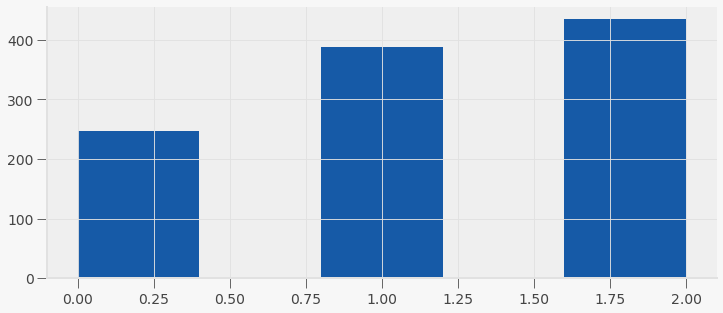

In [23]:
semaforo = df_sub['SEMAFORO']
semaforo
semaforo.hist(bins = 5, figsize=(12, 5))

In [24]:
numericas = ['LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
       'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L',
       'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L', 'SEMAFORO']

for name in numericas:

  df_sub[name] = df_sub[name].astype('str') 
  df_sub[name] = df_sub[name].str.replace('<25','25') 
  df_sub[name] = df_sub[name].str.replace('<0.2','0.2') 
  df_sub[name] = df_sub[name].str.replace('<20','20') 
  df_sub[name] = df_sub[name].str.replace('<1.1','1.1')
  df_sub[name] = df_sub[name].str.replace('<0.02','0.02') 
  df_sub[name] = df_sub[name].str.replace('<0.01','0.01') 
  df_sub[name] = df_sub[name].str.replace('<0.003','0.003')
  df_sub[name] = df_sub[name].str.replace('<0.005','0.005') 
  df_sub[name] = df_sub[name].str.replace('<0.0005','0.0005') 
  df_sub[name] = df_sub[name].str.replace('<0.0015','0.0015') 
  df_sub[name] = df_sub[name].str.replace('<0.025','0.025')
  df_sub[name]= df_sub[name].astype('float')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A va

In [25]:
  df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LONGITUD             1068 non-null   float64
 1   LATITUD              1068 non-null   float64
 2   PERIODO              1068 non-null   float64
 3   ALC_mg/L             1064 non-null   float64
 4   SDT_M_mg/L           1066 non-null   float64
 5   FLUORUROS_mg/L       1068 non-null   float64
 6   DUR_mg/L             1067 non-null   float64
 7   COLI_FEC_NMP/100_mL  1068 non-null   float64
 8   N_NO3_mg/L           1067 non-null   float64
 9   AS_TOT_mg/L          1068 non-null   float64
 10  CD_TOT_mg/L          1068 non-null   float64
 11  CR_TOT_mg/L          1068 non-null   float64
 12  HG_TOT_mg/L          1068 non-null   float64
 13  PB_TOT_mg/L          1068 non-null   float64
 14  MN_TOT_mg/L          1068 non-null   float64
 15  FE_TOT_mg/L          1068 non-null   f

In [26]:
datos_sc = preprocessing.StandardScaler().fit_transform(df_sub)
datos_sc

array([[-0.01956574, -0.24569861,  0.        , ..., -0.1886027 ,
        -0.05804251,  1.05880628],
       [-0.04622943, -0.29955813,  0.        , ..., -0.1886027 ,
        -0.06962256,  1.05880628],
       [-0.05925307, -0.20504341,  0.        , ..., -0.1886027 ,
        -0.06962256, -0.22474095],
       ...,
       [ 0.3087282 ,  0.61462801,  0.        , ..., -0.12828428,
        -0.03567729, -0.22474095],
       [ 0.23345496,  0.42141673,  0.        , ..., -0.16070211,
        -0.04187379,  1.05880628],
       [ 0.17283071,  0.49672073,  0.        , ..., -0.1886027 ,
        -0.06962256,  1.05880628]])

In [27]:
datos_minmax = preprocessing.MinMaxScaler().fit_transform(df_sub)
datos_minmax

array([[4.91345172e-01, 4.22139674e-01, 0.00000000e+00, ...,
        0.00000000e+00, 3.58922672e-04, 1.00000000e+00],
       [4.85350232e-01, 4.10587262e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [4.82422057e-01, 4.30859871e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.00000000e-01],
       ...,
       [5.65157266e-01, 6.06672469e-01, 0.00000000e+00, ...,
        2.52769890e-03, 1.05213058e-03, 5.00000000e-01],
       [5.48233179e-01, 5.65230281e-01, 0.00000000e+00, ...,
        1.16919993e-03, 8.60070553e-04, 1.00000000e+00],
       [5.34602701e-01, 5.81382352e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [28]:
  df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LONGITUD             1068 non-null   float64
 1   LATITUD              1068 non-null   float64
 2   PERIODO              1068 non-null   float64
 3   ALC_mg/L             1064 non-null   float64
 4   SDT_M_mg/L           1066 non-null   float64
 5   FLUORUROS_mg/L       1068 non-null   float64
 6   DUR_mg/L             1067 non-null   float64
 7   COLI_FEC_NMP/100_mL  1068 non-null   float64
 8   N_NO3_mg/L           1067 non-null   float64
 9   AS_TOT_mg/L          1068 non-null   float64
 10  CD_TOT_mg/L          1068 non-null   float64
 11  CR_TOT_mg/L          1068 non-null   float64
 12  HG_TOT_mg/L          1068 non-null   float64
 13  PB_TOT_mg/L          1068 non-null   float64
 14  MN_TOT_mg/L          1068 non-null   float64
 15  FE_TOT_mg/L          1068 non-null   f

In [29]:
for i in numericas:
  print(" nombre de la columna -------------------------" + i)
  
  #print("Valores unicos", df[i].unique())
  print(" sumatoria por valores uncos--------------------") 
  print(df_sub[i].value_counts())

 nombre de la columna -------------------------LONGITUD
 sumatoria por valores uncos--------------------
-98.350389     2
-102.174880    2
-102.022100    1
-92.159140     1
-93.197940     1
              ..
-99.331475     1
-99.349736     1
-99.383056     1
-99.349550     1
-100.733020    1
Name: LONGITUD, Length: 1066, dtype: int64
 nombre de la columna -------------------------LATITUD
 sumatoria por valores uncos--------------------
19.234778    2
22.208870    1
14.839550    1
17.736590    1
17.947400    1
            ..
20.085211    1
20.124508    1
20.132500    1
20.153822    1
25.093800    1
Name: LATITUD, Length: 1067, dtype: int64
 nombre de la columna -------------------------PERIODO
 sumatoria por valores uncos--------------------
2020.0    1068
Name: PERIODO, dtype: int64
 nombre de la columna -------------------------ALC_mg/L
 sumatoria por valores uncos--------------------
157.620    5
193.815    4
195.360    4
204.765    4
257.850    4
          ..
341.000    1
151.000    

#**Análisis**
Describe(), mean()

Identificando tendencias centrales promedio, media y mediana de los datos. 
Identificar medidas de dispersión, máximo, mínimo.

In [30]:
df_sub

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,SEMAFORO
0,-102.02210,22.20887,2020.0,229.990,603.6000,0.9766,213.7320,1.1,4.184656,0.0161,0.003,0.005,0.0005,0.005,0.00150,0.08910,2.0
1,-102.20075,21.99958,2020.0,231.990,445.4000,0.9298,185.0514,1.1,5.750110,0.0134,0.003,0.005,0.0005,0.005,0.00150,0.02500,2.0
2,-102.28801,22.36685,2020.0,204.920,342.0000,1.8045,120.7190,1.1,1.449803,0.0370,0.003,0.005,0.0005,0.005,0.00150,0.02500,1.0
3,-102.29449,22.18435,2020.0,327.000,478.6000,1.1229,199.8790,1.1,1.258597,0.0154,0.003,0.005,0.0005,0.005,0.00150,0.02500,2.0
4,-110.24480,23.45138,2020.0,309.885,1179.0000,0.2343,476.9872,291.0,15.672251,0.0100,0.003,0.005,0.0005,0.005,0.00150,0.02500,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,-99.54191,24.76036,2020.0,231.045,1545.8000,0.2000,752.0960,1.1,14.615488,0.0100,0.003,0.005,0.0005,0.005,0.00150,0.02500,1.0
1064,-99.70099,24.78280,2020.0,256.000,297.0000,0.2000,273.0000,1.1,77.392000,0.0100,0.003,0.005,0.0005,0.005,0.00709,0.07578,1.0
1065,-99.82249,25.55197,2020.0,330.690,1873.0000,0.7574,660.2126,620.0,36.477104,0.0100,0.003,0.005,0.0005,0.005,0.02420,0.21290,1.0
1066,-100.32683,24.80118,2020.0,193.140,690.6667,0.7108,406.3680,1.1,0.020000,0.0100,0.003,0.005,0.0005,0.005,0.01200,0.17860,2.0


In [31]:
df_sub.drop('PERIODO', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [32]:
df_sub.describe().T

,count,mean,std,min,25%,50%,75%,max
LONGITUD,1068.0,-101.891007,6.703263,-116.66425,-105.388865,-102.174180,-98.974716,-86.864120
LATITUD,1068.0,23.163618,3.887670,14.56115,20.212055,22.617190,25.510285,32.677713
ALC_mg/L,1064.0,235.633759,116.874291,26.64000,164.000000,215.527500,292.710000,1650.000000
SDT_M_mg/L,1066.0,896.101567,2751.530590,25.00000,337.500000,550.400000,916.100000,82170.000000
FLUORUROS_mg/L,1068.0,1.075600,1.924278,0.20000,0.267175,0.503500,1.139850,34.803300
DUR_mg/L,1067.0,347.938073,359.669452,20.00000,121.194800,245.335800,453.930000,3810.692200
COLI_FEC_NMP/100_mL,1068.0,355.490356,2052.457014,1.10000,1.100000,1.100000,13.250000,24196.000000
N_NO3_mg/L,1067.0,4.319759,8.345134,0.02000,0.650294,2.080932,5.201698,121.007813
AS_TOT_mg/L,1068.0,0.019618,0.035209,0.01000,0.010000,0.010000,0.010000,0.452200
CD_TOT_mg/L,1068.0,0.003030,0.000894,0.00300,0.003000,0.003000,0.003000,0.032110


#Visualización

- lot, boxplot de pandas
  - Identificar medidas de dispersión, máximo, mínimo.
  - Identificar medidas de posición no centrales , los cuartiles , outliers.  

In [33]:
df_sub.corr

<bound method DataFrame.corr of        LONGITUD   LATITUD  ALC_mg/L  SDT_M_mg/L  FLUORUROS_mg/L  DUR_mg/L  \
0    -102.02210  22.20887   229.990    603.6000          0.9766  213.7320   
1    -102.20075  21.99958   231.990    445.4000          0.9298  185.0514   
2    -102.28801  22.36685   204.920    342.0000          1.8045  120.7190   
3    -102.29449  22.18435   327.000    478.6000          1.1229  199.8790   
4    -110.24480  23.45138   309.885   1179.0000          0.2343  476.9872   
...         ...       ...       ...         ...             ...       ...   
1063  -99.54191  24.76036   231.045   1545.8000          0.2000  752.0960   
1064  -99.70099  24.78280   256.000    297.0000          0.2000  273.0000   
1065  -99.82249  25.55197   330.690   1873.0000          0.7574  660.2126   
1066 -100.32683  24.80118   193.140    690.6667          0.7108  406.3680   
1067 -100.73302  25.09380   263.070    495.0000          0.4002  362.5440   

      COLI_FEC_NMP/100_mL  N_NO3_mg/L  AS_T

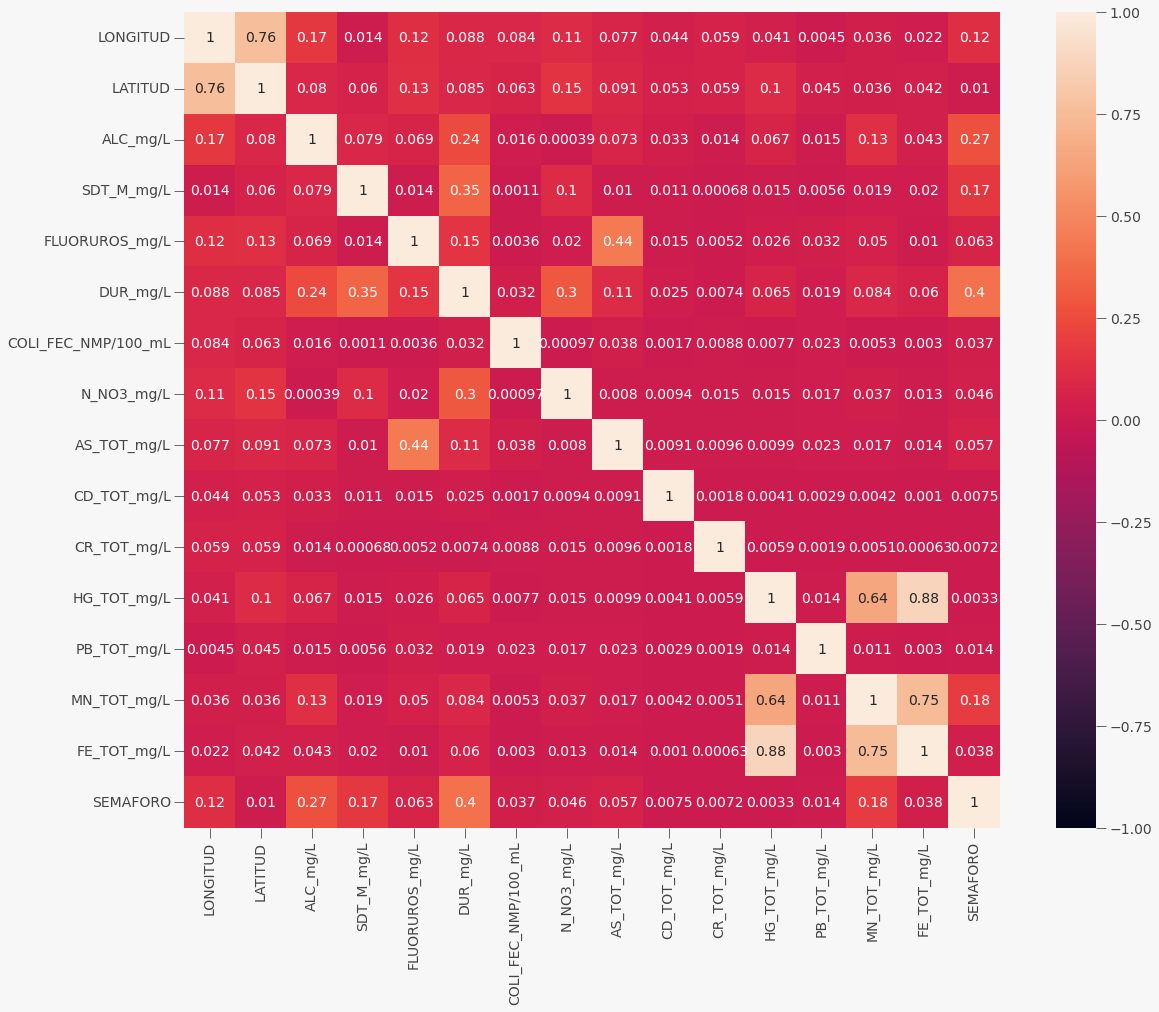

In [34]:
correlacion = df_sub.corr().abs() 

f, ax = plt.subplots(figsize = (20,15)) 

sns.heatmap(correlacion, vmax = 1, vmin = -1, square = True, annot = True)

#**Identificar correlaciones.**

In [35]:
df_sub.corr()

,LONGITUD,LATITUD,ALC_mg/L,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,SEMAFORO
LONGITUD,1.000000,-0.760204,0.167234,-0.013927,-0.122633,0.088181,-0.084443,-0.107540,-0.077090,0.043595,0.058944,0.041102,-0.004493,-0.036141,0.021927,-0.118235
LATITUD,-0.760204,1.000000,-0.080026,0.059878,0.131382,0.085243,0.063130,0.148238,0.090597,-0.053099,-0.058650,-0.102419,-0.045438,-0.036289,-0.041591,-0.010409
ALC_mg/L,0.167234,-0.080026,1.000000,0.079350,0.069056,0.243177,-0.016449,-0.000394,0.073299,0.032686,-0.014282,0.067195,0.015064,0.129866,0.043423,-0.272414
SDT_M_mg/L,-0.013927,0.059878,0.079350,1.000000,-0.013798,0.347205,-0.001133,0.101706,-0.010157,0.010800,-0.000682,0.015114,-0.005552,0.018927,0.020104,-0.165953
FLUORUROS_mg/L,-0.122633,0.131382,0.069056,-0.013798,1.000000,-0.149691,0.003564,-0.019782,0.444079,-0.015123,-0.005242,-0.026358,-0.032236,-0.049742,-0.009994,-0.062859
DUR_mg/L,0.088181,0.085243,0.243177,0.347205,-0.149691,1.000000,0.031727,0.301468,-0.106498,0.025002,0.007438,0.064839,-0.018908,0.083822,0.059775,-0.403367
COLI_FEC_NMP/100_mL,-0.084443,0.063130,-0.016449,-0.001133,0.003564,0.031727,1.000000,-0.000969,0.038151,-0.001656,-0.008840,-0.007661,0.022510,-0.005326,0.003045,-0.036977
N_NO3_mg/L,-0.107540,0.148238,-0.000394,0.101706,-0.019782,0.301468,-0.000969,1.000000,-0.008019,-0.009362,-0.015131,0.014912,-0.016529,-0.036854,0.013298,-0.046095
AS_TOT_mg/L,-0.077090,0.090597,0.073299,-0.010157,0.444079,-0.106498,0.038151,-0.008019,1.000000,-0.009078,-0.009582,-0.009939,-0.023057,0.016916,0.014295,-0.057347
CD_TOT_mg/L,0.043595,-0.053099,0.032686,0.010800,-0.015123,0.025002,-0.001656,-0.009362,-0.009078,1.000000,-0.001781,-0.004083,-0.002875,-0.004205,-0.001036,-0.007466


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


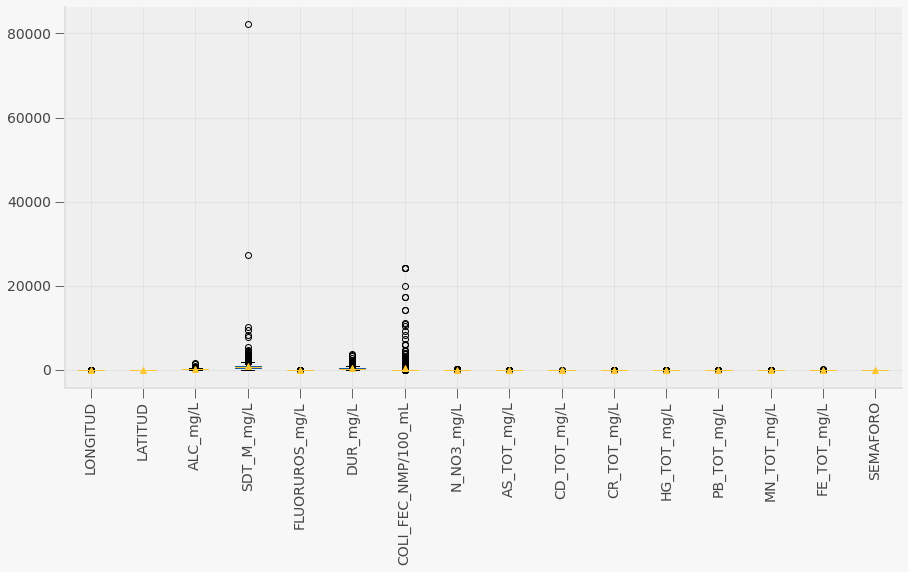

In [36]:
outliers = df_sub.boxplot(figsize = (15,7),showmeans = True)
outliers.plot()
plt.xticks(rotation=90)
plt.show()

# Parte 2

2. Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de **K- means.**

#**Ubicaciones**

In [37]:
df_site = df_subte[['LONGITUD','LATITUD']]
df_site

,LONGITUD,LATITUD
0,-102.02210,22.20887
1,-102.20075,21.99958
2,-102.28801,22.36685
3,-102.29449,22.18435
4,-110.24480,23.45138
...,...,...
1063,-99.54191,24.76036
1064,-99.70099,24.78280
1065,-99.82249,25.55197
1066,-100.32683,24.80118


In [38]:
#Imprimimos la variable de salida semáforo para definir la calidad del agua
print(df_sub[i].value_counts())
semaforo

2.0    434
1.0    387
0.0    247
Name: SEMAFORO, dtype: int64


0       2.0
1       2.0
2       1.0
3       2.0
4       1.0
       ... 
1063    1.0
1064    1.0
1065    1.0
1066    2.0
1067    2.0
Name: SEMAFORO, Length: 1068, dtype: float64

#**Ubicación**

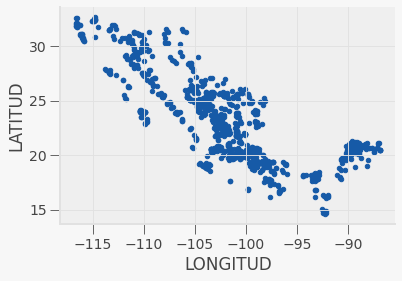

In [39]:
df_site.plot.scatter('LONGITUD','LATITUD')

In [40]:
#Crear columnas de coordenadas

df_site
df_site["COORDENADAS"] = list(zip(df_site.LONGITUD, df_site.LATITUD))
df_site["COORDENADAS"] = df_site["COORDENADAS"].apply(Point)
df_site.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,LONGITUD,LATITUD,COORDENADAS
0,-102.02210,22.20887,POINT (-102.0221 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.2448 23.45138)


,LONGITUD,LATITUD,COORDENADAS
0,-102.02210,22.20887,POINT (-102.02210 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.24480 23.45138)
...,...,...,...
1063,-99.54191,24.76036,POINT (-99.54191 24.76036)
1064,-99.70099,24.78280,POINT (-99.70099 24.78280)
1065,-99.82249,25.55197,POINT (-99.82249 25.55197)
1066,-100.32683,24.80118,POINT (-100.32683 24.80118)


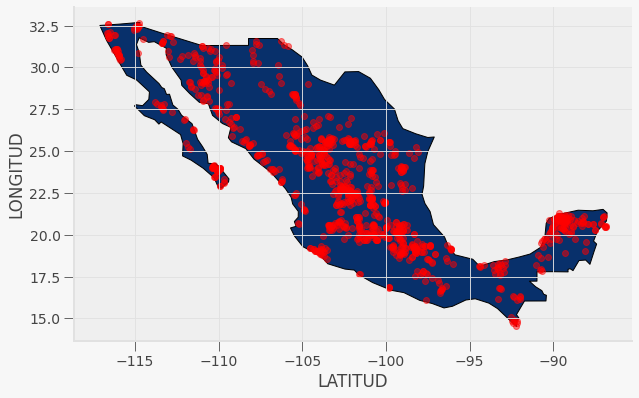

In [41]:
#Creación de puntos del mapa

puntos_coordsub = gpd.GeoDataFrame(df_site, geometry="COORDENADAS")

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world = world.set_index("iso_a3")
world.name.unique()
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black', cmap='Blues_r')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

puntos_coordsub .plot(ax=gax, color='red', alpha = 0.5)
puntos_coordsub

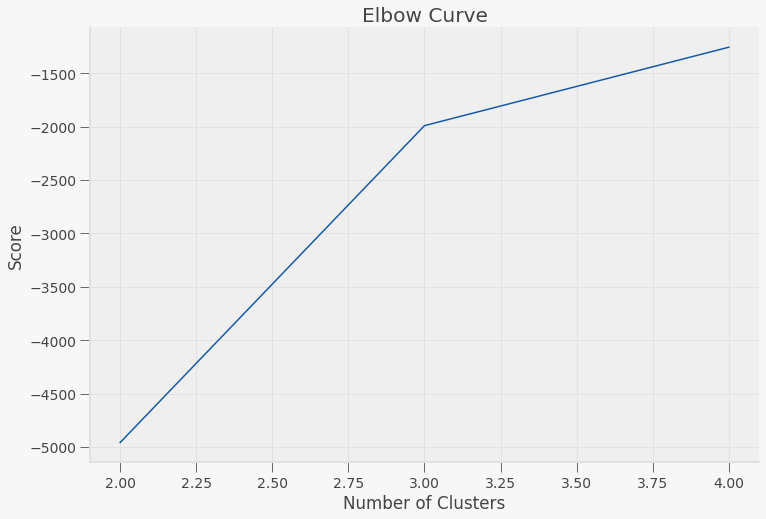

In [42]:
from sklearn.cluster import KMeans

#Creación de cluster
numero_de_closters = range(2, 5) 
mi_kmeans = [KMeans(n_clusters=i) for i in numero_de_closters]
Y_axis = df_site[['LATITUD']]
X_axis = df_site[['LONGITUD']]
calulo_kmeans = [mi_kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(mi_kmeans))]

# Visualize

plt.figure(figsize=(12,8))
plt.plot(numero_de_closters, calulo_kmeans)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')

plt.show()

In [43]:
#Elección de cluster según código del codo

Labels_X = df_sub[['LONGITUD', 'LATITUD']]

#Número de clúster
kmeans_mx = KMeans(n_clusters=10).fit(Labels_X)
centroids = kmeans_mx.cluster_centers_ #se sacan los centroides
labels = kmeans_mx.predict(Labels_X) #labels

# Obtener los centros del clúster
Centroides = kmeans_mx.cluster_centers_ #Valores de centroides

C_MX = pd.DataFrame(Centroides) #convertirlo en DataFrame
C_MX["Coordinates"] = list(zip(C_MX[0], C_MX[1])) #lo convierte en lista 
C_MX["Coordinates"] = C_MX["Coordinates"].apply(Point) #lo convierte en puntos para gráficar

point_center = gpd.GeoDataFrame(C_MX, geometry="Coordinates")
point_center

,0,1,Coordinates
0,-89.188374,20.546897,POINT (-89.18837 20.54690)
1,-104.011010,25.078067,POINT (-104.01101 25.07807)
2,-115.251913,31.614292,POINT (-115.25191 31.61429)
3,-102.435302,20.348589,POINT (-102.43530 20.34859)
4,-109.261826,24.733573,POINT (-109.26183 24.73357)
5,-92.761627,17.004097,POINT (-92.76163 17.00410)
6,-110.992920,29.203521,POINT (-110.99292 29.20352)
7,-100.969413,23.393120,POINT (-100.96941 23.39312)
8,-98.526051,19.187807,POINT (-98.52605 19.18781)
9,-106.395956,29.427649,POINT (-106.39596 29.42765)


In [44]:
df['SEMAFORO'].value_counts()

Verde       434
Rojo        387
Amarillo    247
Name: SEMAFORO, dtype: int64

In [45]:
print(sem_map.head())
print(df_site.head())

  SEMAFORO
0    Verde
1    Verde
2     Rojo
3    Verde
4     Rojo
    LONGITUD   LATITUD                  COORDENADAS
0 -102.02210  22.20887  POINT (-102.02210 22.20887)
1 -102.20075  21.99958  POINT (-102.20075 21.99958)
2 -102.28801  22.36685  POINT (-102.28801 22.36685)
3 -102.29449  22.18435  POINT (-102.29449 22.18435)
4 -110.24480  23.45138  POINT (-110.24480 23.45138)


In [46]:
sem_map['SEMAPHORE'] = sem_map['SEMAFORO'].replace(to_replace = "Verde", value = "green")
sem_map['SEMAPHORE'].replace(to_replace = "Rojo", value = "red", inplace=True)
sem_map['SEMAPHORE'].replace(to_replace = "Amarillo", value = "yellow", inplace=True)
sem_map


,SEMAFORO,SEMAPHORE
0,Verde,green
1,Verde,green
2,Rojo,red
3,Verde,green
4,Rojo,red
...,...,...
1063,Rojo,red
1064,Rojo,red
1065,Rojo,red
1066,Verde,green


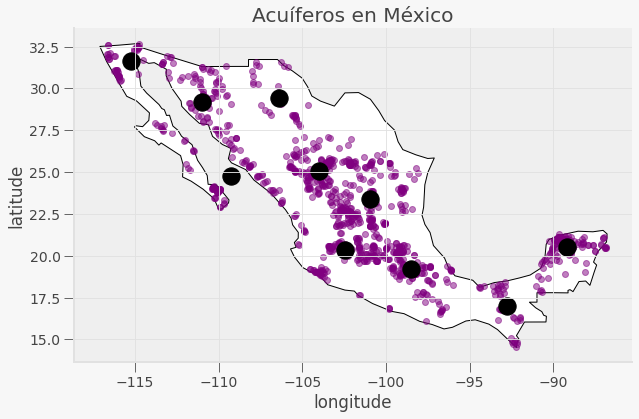

In [47]:
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.

puntos_coordsub.plot(ax=gax, color='purple', alpha = 0.5)
point_center.plot(ax=gax, color='black', alpha = 1, markersize = 300) 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Acuíferos en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

**Distancias entre los pozos**

In [48]:
df_site['kmeans_MX'] = kmeans_mx.labels_ 
df_site.loc[:, 'kmeans_MX'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1    190
8    167
7    159
3    149
0    121
6     86
4     74
2     50
5     41
9     31
Name: kmeans_MX, dtype: int64

In [49]:
point_center

,0,1,Coordinates
0,-89.188374,20.546897,POINT (-89.18837 20.54690)
1,-104.011010,25.078067,POINT (-104.01101 25.07807)
2,-115.251913,31.614292,POINT (-115.25191 31.61429)
3,-102.435302,20.348589,POINT (-102.43530 20.34859)
4,-109.261826,24.733573,POINT (-109.26183 24.73357)
5,-92.761627,17.004097,POINT (-92.76163 17.00410)
6,-110.992920,29.203521,POINT (-110.99292 29.20352)
7,-100.969413,23.393120,POINT (-100.96941 23.39312)
8,-98.526051,19.187807,POINT (-98.52605 19.18781)
9,-106.395956,29.427649,POINT (-106.39596 29.42765)


In [50]:
from pandas.core.internals.concat import concat_arrays

#Coordenadas de las ciudades

Loc_1 = str(point_center[0][0]) + ", " + str(point_center[1][0])  #Coordenada x = columna 1, y = columna 0 --- 
print(Loc_1)
Loc_2 = str(point_center[0][1]) + ", " + str(point_center[1][1])
print(Loc_2)
Loc_3 =  str(point_center[0][2]) + ", " + str(point_center[1][2])
print(Loc_3)
Loc_4 =  str(point_center[0][3]) + ", " + str(point_center[1][3])
print(Loc_4)
Loc_5 =  str(point_center[0][4]) + ", " + str(point_center[1][4])
print(Loc_5)
Loc_6 =  str(point_center[0][5]) + ", " + str(point_center[1][5])
print(Loc_6)
Loc_7 =  str(point_center[0][6]) + ", " + str(point_center[1][6])
print(Loc_7)
Loc_8 =  str(point_center[0][7]) + ", " + str(point_center[1][7])
print(Loc_8)
Loc_9 =  str(point_center[0][8]) + ", " + str(point_center[1][8])
print(Loc_9)
Loc_10 =  str(point_center[0][9]) + ", " + str(point_center[1][9])
print(Loc_10)

-89.18837385123967, 20.546897239669423
-104.01100999473684, 25.078066800000002
-115.25191318, 31.61429212
-102.43530239597315, 20.348589375838927
-109.2618255, 24.73357339189189
-92.76162731707318, 17.00409656097561
-110.99292008139534, 29.203521255813953
-100.9694130691824, 23.393120194968553
-98.52605105988025, 19.18780702994012
-106.39595561290322, 29.427649322580645


In [51]:
print(Loc_1)

-89.18837385123967, 20.546897239669423


#**Ciudades**

In [52]:
import geopy.geocoders
from geopy.geocoders.yandex import Location
from functools import partial
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
from geopy.location import Location

geolocator = Nominatim(user_agent="my-application") 
Localizaciones = [Loc_1, Loc_2, Loc_3, Loc_4, Loc_5, Loc_6]

for i in Localizaciones:
  
  location = geolocator
  print('local en ---', location)

local en --- <geopy.geocoders.osm.Nominatim object at 0x7f4f5eba6490>
local en --- <geopy.geocoders.osm.Nominatim object at 0x7f4f5eba6490>
local en --- <geopy.geocoders.osm.Nominatim object at 0x7f4f5eba6490>
local en --- <geopy.geocoders.osm.Nominatim object at 0x7f4f5eba6490>
local en --- <geopy.geocoders.osm.Nominatim object at 0x7f4f5eba6490>
local en --- <geopy.geocoders.osm.Nominatim object at 0x7f4f5eba6490>


In [53]:
#.reverse(i)

In [ ]:
Dist_1 = str(geodesic(Loc_1, Loc_2).miles)
print("\nDistancia entre el primer y segundo almacén : ", Dist_1, " ft2 \n") 
Dist_2 = str(geodesic(Loc_2, Loc_3).miles)
print("Distancia entre el segundo y tercer local : ", Dist_2, " ml \n")
Dist_3 = str(geodesic(Loc_3, Loc_4).miles)
print("Distancia entre el segundo y tercer local : ", Dist_3, " ml \n")
Dist_4 = str(geodesic(Loc_4, Loc_5).miles)
print("Distancia entre el segundo y tercer local : ", Dist_4, " ml \n")
Dist_5 = str(geodesic(Loc_5, Loc_6).miles)
print("Distancia entre el segundo y tercer local : ", Dist_5, " ml \n")
Dist_6 = str(geodesic(Loc_6, Loc_7).miles)
print("Distancia entre el segundo y tercer local : ", Dist_6, " ml \n")
Dist_7 = str(geodesic(Loc_6, Loc_7).miles)
print("Distancia entre el segundo y tercer local : ", Dist_7, " ml \n")
Dist_8 = str(geodesic(Loc_7, Loc_8).miles)
print("Distancia entre el segundo y tercer local : ", Dist_8, " ml \n")
Dist_9 = str(geodesic(Loc_8, Loc_9).miles)
print("Distancia entre el segundo y tercer local : ", Dist_9, " ml \n")
Dist_10 = str(geodesic(Loc_9, Loc_10).miles)
print("Distancia entre el segundo y tercer local : ", Dist_10, " ml \n")

# Resultados

Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

In [56]:
df_subte['CALIDAD_ALC'].value_counts()

Alta                    794
Media                   187
Indeseable como FAAP     59
Baja                     24
Name: CALIDAD_ALC, dtype: int64

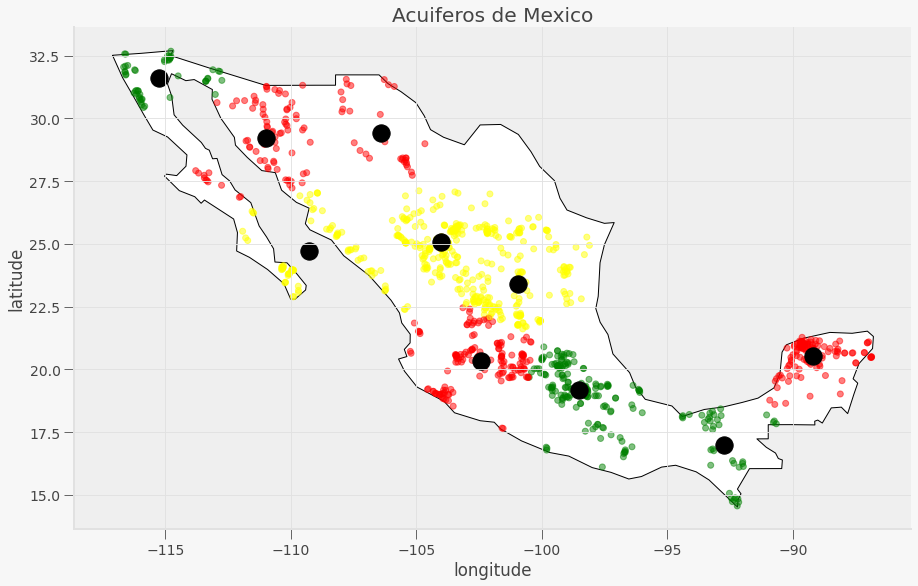

In [57]:
fig, gax = plt.subplots(figsize=(15,10))
colores = ['red','yellow','green','red','yellow','green','red','yellow','green','red','yellow','green']
color_asig = []

for row in labels:
  color_asig.append(colores[row])

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white') #filtramos por pais

puntos_coordsub.plot(ax=gax, color=color_asig, alpha = 0.5) 
point_center.plot(ax=gax, color='black', alpha = 1, markersize = 300) 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Acuiferos de Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [58]:
puntos_coordsub['COLOR']= sem_map['SEMAFORO']
puntos_coordsub['CLUSTER'] = labels
puntos_coordsub

,LONGITUD,LATITUD,COORDENADAS,kmeans_MX,COLOR,CLUSTER
0,-102.02210,22.20887,POINT (-102.02210 22.20887),7,Verde,7
1,-102.20075,21.99958,POINT (-102.20075 21.99958),3,Verde,3
2,-102.28801,22.36685,POINT (-102.28801 22.36685),7,Rojo,7
3,-102.29449,22.18435,POINT (-102.29449 22.18435),7,Verde,7
4,-110.24480,23.45138,POINT (-110.24480 23.45138),4,Rojo,4
...,...,...,...,...,...,...
1063,-99.54191,24.76036,POINT (-99.54191 24.76036),7,Rojo,7
1064,-99.70099,24.78280,POINT (-99.70099 24.78280),7,Rojo,7
1065,-99.82249,25.55197,POINT (-99.82249 25.55197),7,Rojo,7
1066,-100.32683,24.80118,POINT (-100.32683 24.80118),7,Verde,7


In [59]:
new_df = puntos_coordsub[puntos_coordsub.CLUSTER == 0].copy()
new_df.shape

(121, 6)

In [60]:
#Sacamos la moda , para revisar los datos correspondientes a la variable del SEMAFORO


list_moda=[]

for i in range(0, 10): # Recorrido
  
  nuevo_dataset = pd.DataFrame()
  nuevo_dataset = puntos_coordsub[puntos_coordsub.CLUSTER == i].copy()
  
  #Se define el objeto de moda para cada color
  def_moda = new_df['COLOR'].mode()[0] 
  
  #Genra lista
  list_moda.append(def_moda) 

len(list_moda)

10

In [61]:
point_center['MODA'] = list_moda
point_center

,0,1,Coordinates,MODA
0,-89.188374,20.546897,POINT (-89.18837 20.54690),Amarillo
1,-104.011010,25.078067,POINT (-104.01101 25.07807),Amarillo
2,-115.251913,31.614292,POINT (-115.25191 31.61429),Amarillo
3,-102.435302,20.348589,POINT (-102.43530 20.34859),Amarillo
4,-109.261826,24.733573,POINT (-109.26183 24.73357),Amarillo
5,-92.761627,17.004097,POINT (-92.76163 17.00410),Amarillo
6,-110.992920,29.203521,POINT (-110.99292 29.20352),Amarillo
7,-100.969413,23.393120,POINT (-100.96941 23.39312),Amarillo
8,-98.526051,19.187807,POINT (-98.52605 19.18781),Amarillo
9,-106.395956,29.427649,POINT (-106.39596 29.42765),Amarillo


In [62]:
print(point_center)
print(puntos_coordsub)

            0          1                  Coordinates      MODA
0  -89.188374  20.546897   POINT (-89.18837 20.54690)  Amarillo
1 -104.011010  25.078067  POINT (-104.01101 25.07807)  Amarillo
2 -115.251913  31.614292  POINT (-115.25191 31.61429)  Amarillo
3 -102.435302  20.348589  POINT (-102.43530 20.34859)  Amarillo
4 -109.261826  24.733573  POINT (-109.26183 24.73357)  Amarillo
5  -92.761627  17.004097   POINT (-92.76163 17.00410)  Amarillo
6 -110.992920  29.203521  POINT (-110.99292 29.20352)  Amarillo
7 -100.969413  23.393120  POINT (-100.96941 23.39312)  Amarillo
8  -98.526051  19.187807   POINT (-98.52605 19.18781)  Amarillo
9 -106.395956  29.427649  POINT (-106.39596 29.42765)  Amarillo
       LONGITUD   LATITUD                  COORDENADAS  kmeans_MX  COLOR  \
0    -102.02210  22.20887  POINT (-102.02210 22.20887)          7  Verde   
1    -102.20075  21.99958  POINT (-102.20075 21.99958)          3  Verde   
2    -102.28801  22.36685  POINT (-102.28801 22.36685)          7   

In [64]:
list_colors = []

for i in range(0,10):
  if list_moda[i] == 'Verde':
    list_colors.append('green')
  if list_moda[i] == 'Rojo':
    list_colors.append('red')
  if list_moda[i] == 'Amarillo':
    list_colors.append('yellow')

len(list_colors)

10

In [65]:
list_colors_i = []

for i in range(0,1068):
  if puntos_coordsub.COLOR[i] == 'Verde':
    list_colors_i.append('green')
  if puntos_coordsub.COLOR[i] == 'Rojo':
    list_colors_i.append('red')
  if puntos_coordsub.COLOR[i] == 'Amarillo':
    list_colors_i.append('yellow')

len(list_colors_i)

1068

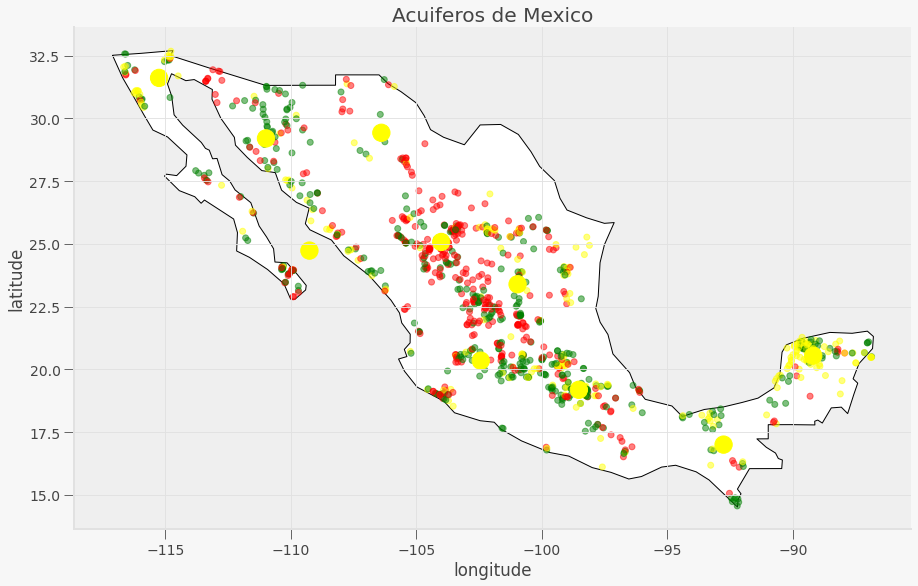

In [66]:
fig, gax = plt.subplots(figsize=(15,10))
#colores = ['red','yellow','green','red','yellow','green','red','yellow','green','red','yellow','green','red','yellow','green','red','yellow','green','red','yellow']
color_asig = []
color_individual = puntos_coordsub['COLOR']

for row in range(0,len(list_colors)):
  color_asig.append(list_colors[row])

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white') #filtramos por pais

puntos_coordsub.plot(ax=gax, color=list_colors_i, alpha = 0.5) 
point_center.plot(ax=gax, color=color_asig, alpha = 1, markersize = 300) 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Acuiferos de Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [67]:
len(color_asig)

10

In [72]:
#Cuántos clúster fueron usados
df_sub_c= df_subte.copy(deep=True)
df_sub_c['CLUSTER'] = labels


_clusters = df_sub_c.groupby('CLUSTER')['CLUSTER'].count()
print(_clusters)

CLUSTER
0    121
1    190
2     50
3    149
4     74
5     41
6     86
7    159
8    167
9     31
Name: CLUSTER, dtype: int64
